<div style="width:100%; background-color: #D9EDF7; border: 1px solid #CFCFCF; text-align: left; padding: 10px;">
      <b>Renewable power plants: Main notebook</b>
      <ul>
        <li>Main notebook</li>
        <li><a href="download_and_process.ipynb">Download and process notebook</a></li>
        <li><a href="validation_and_output.ipynb">Validation and output notebook</a></li>
      </ul>
      <br>This notebook is part of the <a href="http://data.open-power-system-data.org/renewable_power_plants"> Renewable power plants Data Package</a> of <a href="http://open-power-system-data.org">Open Power System Data</a>.
</div>

# About Open Power System Data 
This Notebook is part of the project [Open Power System Data](http://open-power-system-data.org). Open Power System Data develops a platform for free and open data for electricity system modeling. We collect, check, process, document, and provide data that are publicly available but currently inconvenient to use. 
More info on Open Power System Data:
- [Information on the project on our website](http://open-power-system-data.org)
- [Data and metadata on our data platform](http://data.open-power-system-data.org)
- [Data processing scripts on our GitHub page](https://github.com/Open-Power-System-Data)

# About Jupyter Notebooks and GitHub
This file is a [Jupyter Notebook](http://jupyter.org/). A Jupyter Notebook is a file that combines executable programming code with visualizations and comments in markdown format, allowing for an intuitive documentation of the code. We use Jupyter Notebooks for combined coding and documentation. We use Python 3 as programming language. All Notebooks are stored on [GitHub](https://github.com/), a platform for software development, and are publicly available. More information on our IT-concept can be found [here](http://open-power-system-data.org/it). See also our [step-by-step manual](http://open-power-system-data.org/step-by-step) how to use the dataplatform.
 
# About this Data Package
We provide data in different chunks, or [Data Packages](http://frictionlessdata.io/data-packages/). The one you are looking at right now, [Renewable power plants](http://data.open-power-system-data.org/renewable_power_plants/), contains

* lists of renewable energy power plants of selected countries in Europe
* daily time series of cumulated installed capacity per energy source type for Germany.

Due to differing data availability, the power plant lists are of variable accuracy and partly provide different power plant parameters. Therefore the lists are provided in addition to the overall European list also as separate CSV files per country and as separate sheets in the Excel file, which contain more information than the European list.

# Set up the notebook

Import packages and modules needed to automatically generate parts of this notebook.

In [1]:
import pandas as pd
import importlib
import util.visualizer
import os
import matplotlib as plt
from IPython.display import display
import os
import pandas as pd
import util.helper

# Countries

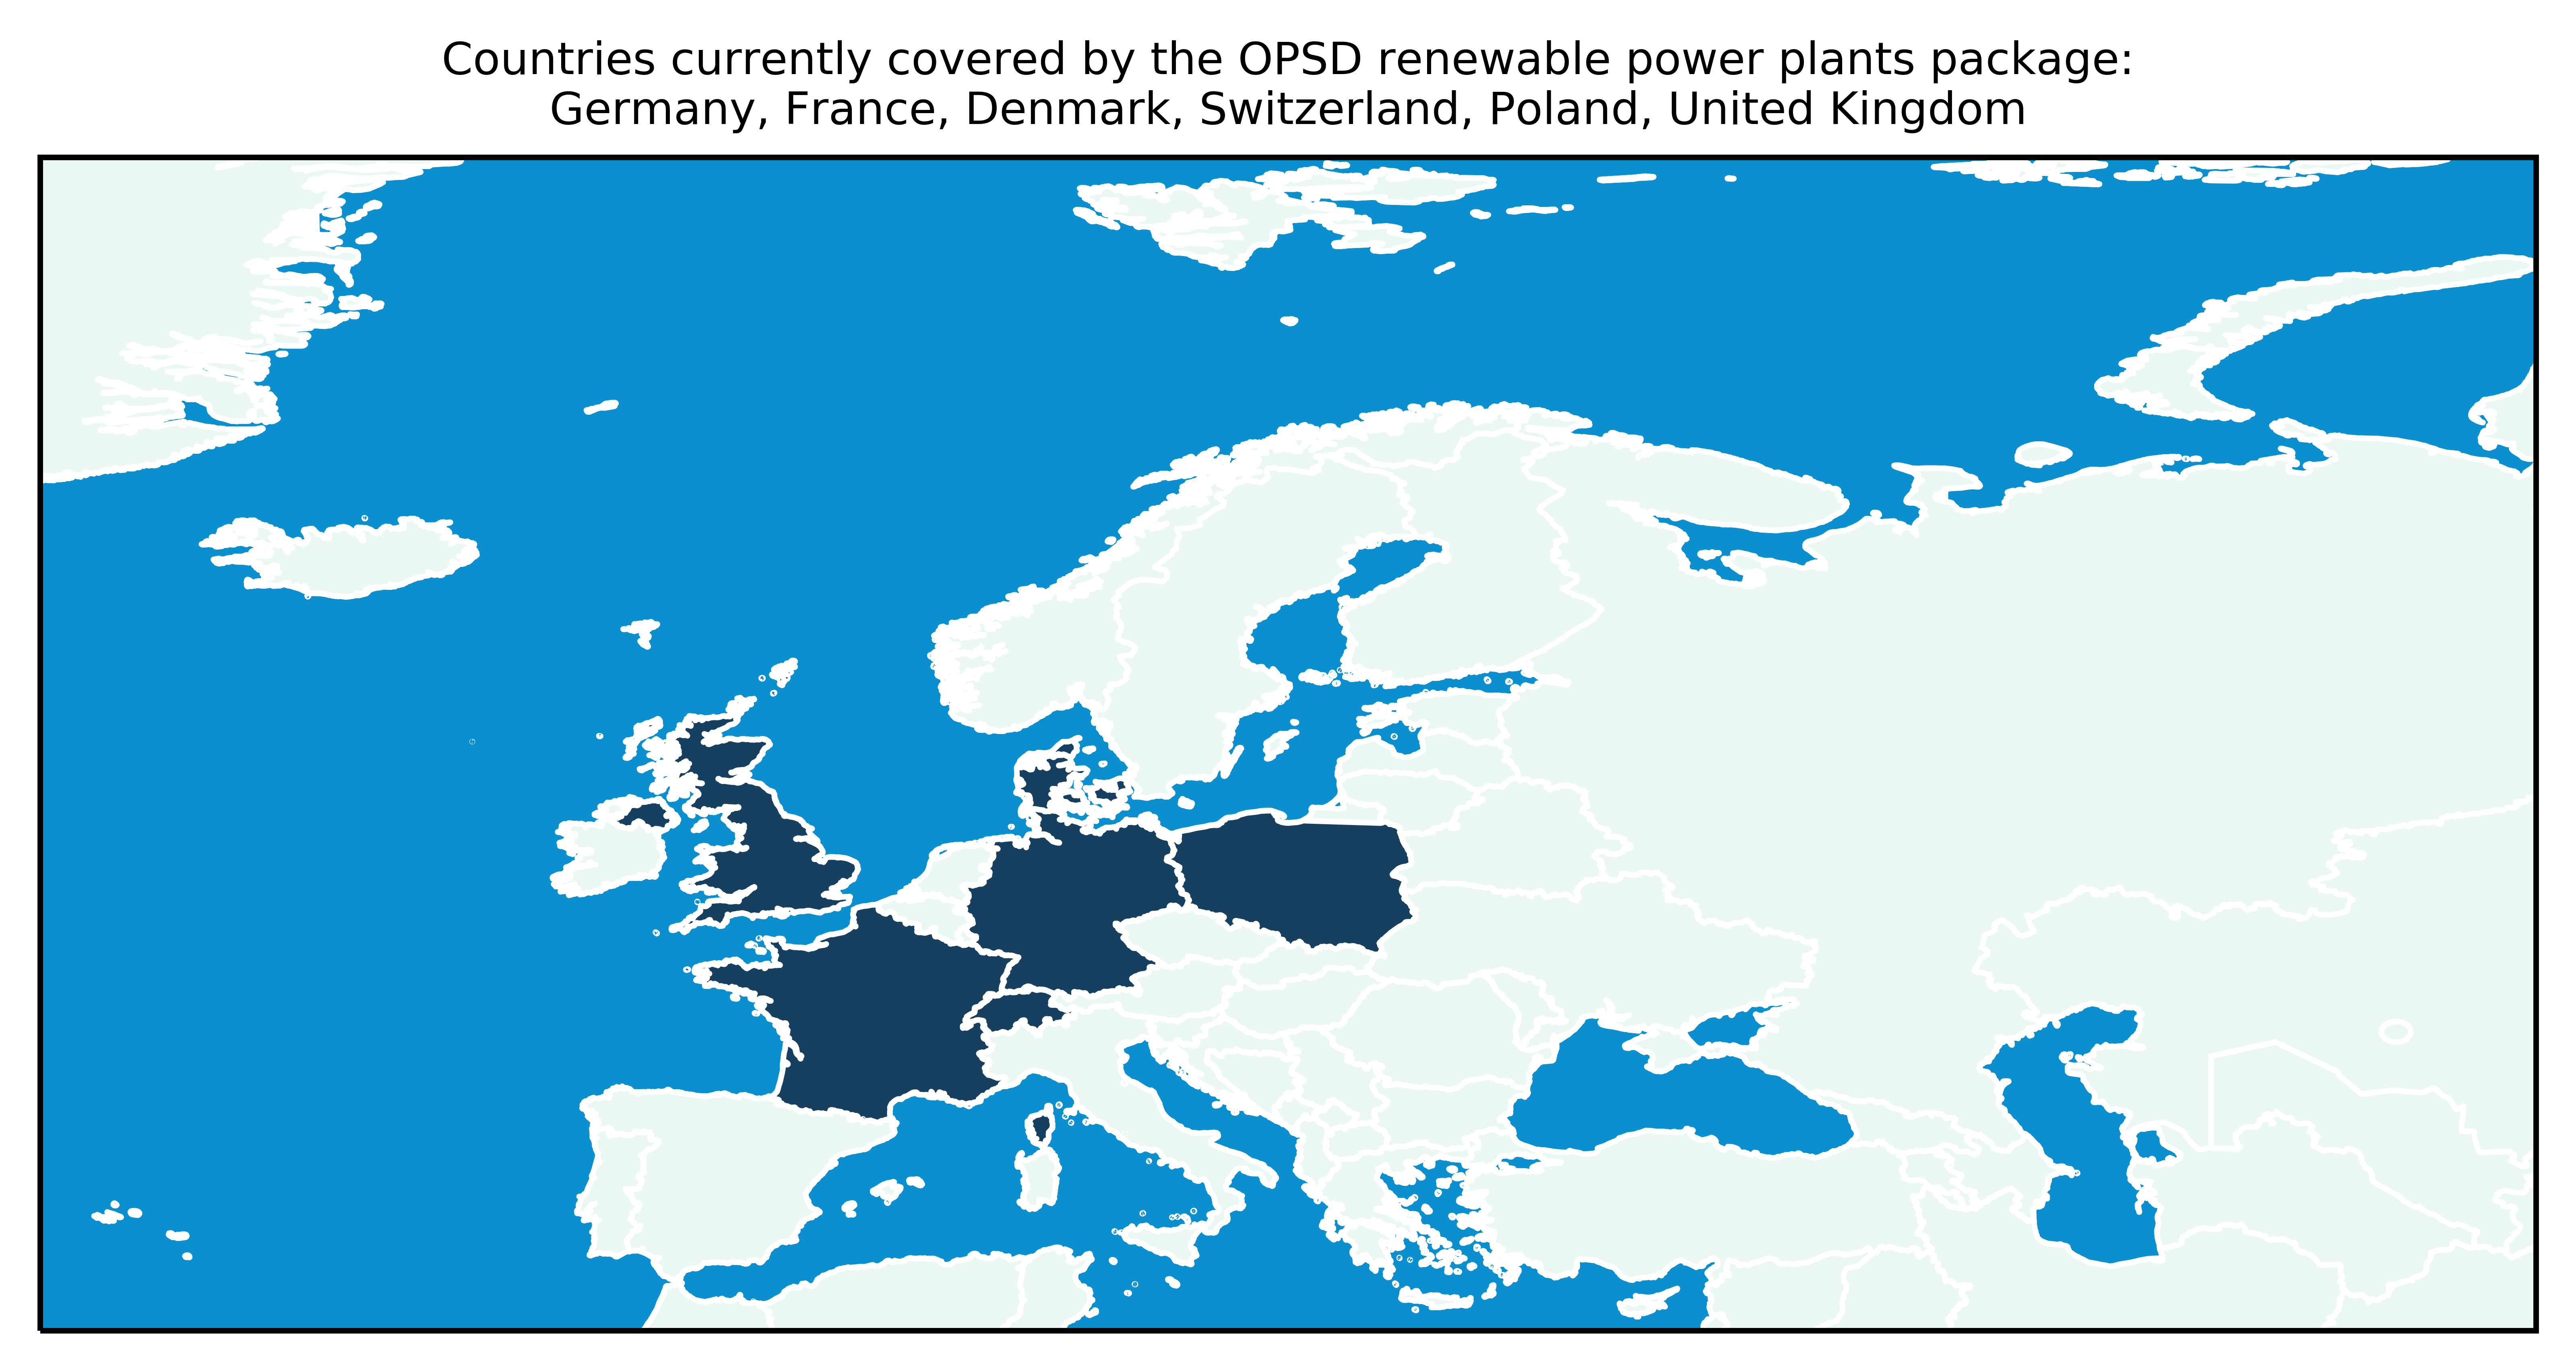

In [2]:
country_list_filepath = os.path.join('input', 'countries.csv')
countries_df = pd.read_csv(country_list_filepath)
util.visualizer.visualize_countries(countries_df['full_name'].tolist())

# Data sources

This Data Package uses the following main data sources (run the next cell to auto-generate the list of sources used).

In [3]:
source_list_filepath = os.path.join('input', 'sources.csv')
country_list_filepath = os.path.join('input', 'countries.csv')
countries_df = pd.read_csv(country_list_filepath)
sources_df = pd.read_csv(source_list_filepath)
markdowns = util.helper.get_markdowns_for_sources(countries_df, sources_df)
for markdown in markdowns:
    display(markdown)

## Germany - DE
Individual power plants, all renewable energy plants supported by the German Renewable Energy Law (EEG).
In Germany, the four TSOs (50Hertz, Amprion, Tennet, TransnetBW) publish individual plant-level data on renewable power plants on their joint platform Netztransparenz.de. Since they are only updated once per year (usually in August) for the past year, their data is often a bit outdated. We therefore complement their data with data from BNetzA, which has more recent data.

Since August 2014 the BNetzA is responsible to publish the renewable power plants register. The legal framework for the register is  specified in the EEG 2014 [(German)](http://www.gesetze-im-internet.de/eeg_2014/) [(English)](http://www.res-legal.eu/search-by-country/germany/single/s/res-e/t/promotion/aid/feed-in-tariff-eeg-feed-in-tariff/lastp/135/). All power plants are listed in a new format: two separate MS-Excel and CSV files for roof-mounted PV power plants ['PV-Datenmeldungen'](https://www.bundesnetzagentur.de/DE/Sachgebiete/ElektrizitaetundGas/Unternehmen_Institutionen/ErneuerbareEnergien/ZahlenDatenInformationen/EEG_Registerdaten/EEG_Registerdaten_node.html) and all other renewable power plants [' Anlagenregister'](https://www.bundesnetzagentur.de/DE/Sachgebiete/ElektrizitaetundGas/Unternehmen_Institutionen/ErneuerbareEnergien/ZahlenDatenInformationen/EEG_Registerdaten/EEG_Registerdaten_node.html).

From the beginning of 2019, BNetzA has switched to the Marktstammdatenregister (MaStR, central register for installation data). This is, however, not used yet for OPSD data. We will change to using the MaStR most likely for the 2020 version of the OPSD data package.


- [Bundesnetzagentur](https://www.bundesnetzagentur.de/SharedDocs/Downloads/DE/Sachgebiete/Energie/Unternehmen_Institutionen/ErneuerbareEnergien/ZahlenDatenInformationen/VOeFF_Registerdaten/2018_12_Veroeff_RegDaten.xlsx?__blob=publicationFile&v=2) - Bundesnetzagentur register of renewable power plants (excl. PV)
- [bnetza_pv_historic?](https://www.bundesnetzagentur.de/SharedDocs/Downloads/DE/Sachgebiete/Energie/Unternehmen_Institutionen/ErneuerbareEnergien/ZahlenDatenInformationen/PV_Datenmeldungen/Archiv_PV/Meldungen_Aug-Juni2017.xlsx?__blob=publicationFile&v=2) - Bundesnetzagentur register of PV power plants
- [bnetza_pv?](https://www.bundesnetzagentur.de/SharedDocs/Downloads/DE/Sachgebiete/Energie/Unternehmen_Institutionen/ErneuerbareEnergien/ZahlenDatenInformationen/PV_Datenmeldungen/Meldungen_Juli17-Dez18.xlsx?__blob=publicationFile&v=2) - Bundesnetzagentur register of PV power plants
- [Amprion](https://www.netztransparenz.de/portals/1/Content/Erneuerbare-Energien-Gesetz/EEG-Anlagestammdaten/Netztransparenz%20Anlagenstammdaten%202017%20Amprion%20GmbH_V03.zip) - Netztransparenz.de - information platform of German TSOs (register of renewable power plants in their control area)
- [TransnetBW](https://www.netztransparenz.de/portals/1/Content/Erneuerbare-Energien-Gesetz/EEG-Anlagestammdaten/Netztransparenz%20Anlagenstammdaten%202017%20TransnetBW%20GmbH.zip) - Netztransparenz.de - information platform of German TSOs (register of renewable power plants in their control area)
- [50Hertz](https://www.netztransparenz.de/portals/1/Content/Erneuerbare-Energien-Gesetz/EEG-Anlagestammdaten/Netztransparenz%20Anlagenstammdaten%202017%2050Hertz%20Transmission%20GmbH.zip) - Netztransparenz.de - information platform of German TSOs (register of renewable power plants in their control area)
- [Tennet](https://www.netztransparenz.de/portals/1/Content/Erneuerbare-Energien-Gesetz/EEG-Anlagestammdaten/Netztransparenz%20Anlagenstammdaten%202017%20TenneT%20TSO%20GmbH.zip) - Netztransparenz.de - information platform of German TSOs (register of renewable power plants in their control area)

## France - FR
Summed capacity and number of installations per energy source per municipality (Commune).

- [Ministère de la Transition écologique et solidaire](http://www.statistiques.developpement-durable.gouv.fr/sites/default/files/2019-01/donnees-locales-2017-loi2000-secretise.xls) - Ministry for the Ecological and Inclusive Transition

> The data is annually published on the france [website for statistics](https://www.statistiques.developpement-durable.gouv.fr/donnees-locales-relatives-aux-installations-de-production-delectricite-renouvelable-beneficiant-0?rubrique=23&dossier=189) as an Excel file. The Excel chart includes number and installed capacity of the different renewable source for every municipality in France. It is limited to the plants which are covered by article 10 of february 2000 by an agreement to a purchase commitment.


## Denmark - DK
Wind and phovoltaic power plants with a high level of detail.

- [Energystyrelsen](https://ens.dk/sites/ens.dk/files/Statistik/anlaegprodtilnettet.xls) - Energy Agency Denmark

> The Danish Energy Agency publishes a national master data register for wind turbines which was created in collaboration with the transmission system operators. The publication is monthly as an Excel file. The data set includes all electricity-generating wind turbines with information about technical data, location data and production data.


- [Energinet](https://data.open-power-system-data.org/renewable_power_plants/2018-03-08/original_data/SolcellerGraf-2016-11.xlsx) - Transmission system Operator in Denmark

> The photovoltaic statistic used to be published from Energinet, included information about location, year of implementing, installed capacity and number of systems. Since Energinet stopped publishing this, and the Danish Energy Agency, which has taken over the job of keeping that register has not published a register yet, we revert to old data for Danish solar from our previous OPSD data package version.


## Switzerland - CH
All renewable-energy power plants supported by the feed-in-tariff KEV (Kostendeckende Einspeisevergütung).

- [Bundesamt für Energie](https://www.bfe.admin.ch/bfe/de/home/foerderung/erneuerbare-energien/einspeiseverguetung/_jcr_content/par/tabs/items/tab/tabpar/externalcontent.external.exturl.xlsx/aHR0cHM6Ly9wdWJkYi5iZmUuYWRtaW4uY2gvZGUvcHVibGljYX/Rpb24vZG93bmxvYWQvOTMxMC54bHN4.xlsx) - Swiss Federal Office of Energy

> Data of all renewable power plants receiving 'Kostendeckende Einspeisevergütung' (KEV) which is the Swiss feed in tarif for renewable power plants. Geodata is based on municipality codes.


## Poland - PL
Summed capacity and number of installations per energy source per municipality (Powiat).

- [Urzad Regulacji Energetyki](https://data.open-power-system-data.org/renewable_power_plants/2018-03-08/original_data/simple.rtf) - Energy Regulatory Office of Poland

> Number of installations and installed capacity per energy source of renewable energy, summed per powiat (districts) is illustrated on the page and can be downloaded as rtf-file. However, the file is no longer available. Therefore we use an old version from OPSD.


## United Kingdom - UK
Renewable-energy power plants in the United Kingdom.

- [UK Government Department for Business, Energy & Industrial Strategy](https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/795492/renewable-energy-public-database-q1-2019.csv) - Renewable Energy Planning Database quarterly extract

> The Renewable Energy Planning Database (REPD) is managed by Eunomia Research and Consulting Ltd (Eunomia) on behalf of the Department of Business, Energy & Industrial Strategy (BEIS). The database tracks the progress of renewable electricity projects (including those that could also be used for combined heat and power (CHP)).


A complete list of data sources is provided on the [Data Package information website](http://data.open-power-system-data.org/renewable_power_plants/). They are also contained in the JSON file that contains all metadata.

# Naming Conventions
## Column translation list
This list provides all internal translations of column original names to the OPSD standard names in order to achieve common data structure for data of all implemented countries as well as the other data packages. 

In [4]:
import pandas as pd
pd.read_csv('input/column_translation_list.csv')

,original_name,opsd_name,description,country,data_source
0,ÜNB,tso,Name of transmission system operator,DE,50Hertz / Amprion / TenneT / TransnetBW
1,REGELZONE,tso,Name of transmission system operator,DE,50Hertz / Amprion / TenneT / TransnetBW
2,Regelzonenbezeichnung,tso,Name of transmission system operator,DE,50Hertz / Amprion / TenneT / TransnetBW
3,REGELZONENBEZEICHNUNG,tso,Name of transmission system operator,DE,50Hertz / Amprion / TenneT / TransnetBW
4,Netzbetreiber Name,dso,Name of distribution system operator,DE,50Hertz / Amprion / TenneT / TransnetBW
5,NETZBETREIBER_NAME,dso,Name of distribution system operator,DE,50Hertz / Amprion / TenneT / TransnetBW
6,Netzbetreiber Betriebsnummer,dso_id,Company number of dso,DE,50Hertz / Amprion / TenneT / TransnetBW
7,NETZBETREIBER_BETRIEBSNUMMER,dso_id,Company number of dso,DE,50Hertz / Amprion / TenneT / TransnetBW
8,ÜNB-Anlagenschlüssel,eeg_id,German EEG renumeration ID number,DE,50Hertz / Amprion / TenneT / TransnetBW
9,ÜNB-Anlagennummer,eeg_id,German EEG renumeration ID number,DE,50Hertz / Amprion / TenneT / TransnetBW


## Value translation list

This list provides all internal translations of original value names to the OPSD standard names in order to achieve common data structure for data of all implemented countries as well as the other data packages. 

In [5]:
import pandas as pd
pd.read_csv('input/value_translation_list.csv')

,original_name,opsd_name,energy_source_level_2,country,data_source
0,Wind Land,Onshore,Wind,DE,BNetzA
1,Wind See,Offshore,Wind,DE,BNetzA
2,Klärgas,Sewage and landfill gas,Bioenergy,DE,BNetzA / TransnetBW / TenneT / 50Hertz / Amprion
3,Grubengas,Other fossil fuels,Other fossil fuels,DE,BnetzA/ Amprion
4,Freifläche PV,Photovoltaics ground,Solar,DE,BNetzA
5,Deponiegas,Sewage and landfill gas,Bioenergy,DE,BNetzA / TransnetBW / TenneT / 50Hertz / Amprion
6,Biomasse,Biomass and biogas,Bioenergy,DE,BNetzA / TransnetBW / TenneT / 50Hertz / Amprion
7,Wasserkraft,Run-of-river,Hydro,DE,BNetzA / TransnetBW / TenneT / 50Hertz / Amprion
8,Wasser,Run-of-river,Hydro,DE,BNetzA / TransnetBW / TenneT / 50Hertz / Amprion
9,Wind an Land,Onshore,Wind,DE,TransnetBW / TenneT / 50Hertz / Amprion


## Energy source structure
![OPSD-Tree](http://open-power-system-data.org/2016-10-25-opsd_tree.svg)
 
# License
This Jupyter Notebook as well as all other documents in this repository is published under the [MIT License](LICENSE.md).